In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv('Athelete.csv')

print(df.shape)
print(df.head())


(3111, 28)
              Athlete        Date Day.of.Week   RHR    HRV  Recovery  \
0  Athlete 1 Bergdorf  01-01-2022         NaN   NaN    NaN       NaN   
1  Athlete 1 Bergdorf  01-10-2022      Monday  48.0  120.0      58.0   
2  Athlete 1 Bergdorf  01-11-2022         NaN   NaN    NaN       NaN   
3  Athlete 1 Bergdorf  01-12-2022         NaN   NaN    NaN       NaN   
4  Athlete 1 Bergdorf   1/13/2022    Thursday  53.0  121.0      61.0   

   Sleep.Score  Hours.in.Bed  Hours.of.Sleep  Sleep.Need  ...  Awake..hours.  \
0          NaN           NaN             NaN         NaN  ...            NaN   
1         51.0          6.36            5.62       11.02  ...           0.74   
2          NaN           NaN             NaN         NaN  ...            NaN   
3          NaN           NaN             NaN         NaN  ...            NaN   
4         55.0          6.25            5.56       10.15  ...           0.70   

   Sleep.Debt..hours.  Sleep.Consistency  Respiratory.Rate  \
0            

In [92]:
print(df.describe())
print(df.info())


               RHR          HRV     Recovery  Sleep.Score  Hours.in.Bed  \
count  1981.000000  1981.000000  1981.000000  1981.000000   1981.000000   
mean     59.693084    84.065623    59.546189    76.393236      7.780843   
std       9.003574    36.105314    22.664673    18.553590      1.927197   
min      39.000000    14.000000     1.000000    10.000000      1.050000   
25%      53.000000    56.000000    43.000000    64.000000      6.580000   
50%      58.000000    79.000000    61.000000    78.000000      7.800000   
75%      65.000000   110.000000    77.000000    92.000000      8.960000   
max     120.000000   188.000000    99.000000   100.000000     17.130000   

       Hours.of.Sleep   Sleep.Need  Sleep.Efficiency....  Wake.Periods  \
count     1981.000000  1981.000000           1981.000000   1621.000000   
mean         6.890545     8.910611             88.865724     14.870450   
std          1.652425     1.117639              6.296796      6.613342   
min          0.820000     1.

In [93]:
for column in df.columns:
    print(f"Column '{column}': {df[column].isna().sum()} null values")

Column 'Athlete': 0 null values
Column 'Date': 0 null values
Column 'Day.of.Week': 1124 null values
Column 'RHR': 1130 null values
Column 'HRV': 1130 null values
Column 'Recovery': 1130 null values
Column 'Sleep.Score': 1130 null values
Column 'Hours.in.Bed': 1130 null values
Column 'Hours.of.Sleep': 1130 null values
Column 'Sleep.Need': 1130 null values
Column 'Sleep.Efficiency....': 1130 null values
Column 'Wake.Periods': 1490 null values
Column 'Sleep.Disturbances': 1130 null values
Column 'Latency..min.': 1130 null values
Column 'Cycles': 1130 null values
Column 'REM.Sleep..hours.': 1130 null values
Column 'Deep.Sleep..hours.': 1130 null values
Column 'Light.Sleep..hours.': 1130 null values
Column 'Awake..hours.': 1130 null values
Column 'Sleep.Debt..hours.': 1130 null values
Column 'Sleep.Consistency': 1401 null values
Column 'Respiratory.Rate': 1134 null values
Column 'Total.Cycle.Sleep.Time..hours.': 1130 null values
Column 'REM.Percentage': 1130 null values
Column 'Deep.Sleep.P

In [94]:
df = df.dropna(how='all')
df.shape

(3111, 28)

In [95]:
for column in df.columns:
      if df[column].dtype == 'object':
        df.drop(column, axis=1, inplace=True)

print(df.shape)

(3111, 25)


In [96]:
df.to_csv('cleaned_data_Athelete.csv', index=False)

In [97]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

imputer = IterativeImputer(estimator=xgb.XGBRegressor(n_estimators=200, learning_rate = 0.05 ,random_state=42),max_iter=15 ,random_state=42)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)


df_imputed.to_csv('Athelete_imputed.csv', index=False)

print(df_imputed.shape)

print(df_imputed.head())

df_imputed.info()

(3111, 25)
         RHR         HRV   Recovery  Sleep.Score  Hours.in.Bed  \
0  53.814453   79.523544  65.397011      71.0728      8.029248   
1  48.000000  120.000000  58.000000      51.0000      6.360000   
2  53.814453   79.523544  65.397011      71.0728      8.029248   
3  53.814453   79.523544  65.397011      71.0728      8.029248   
4  53.000000  121.000000  61.000000      55.0000      6.250000   

   Hours.of.Sleep  Sleep.Need  Sleep.Efficiency....  Wake.Periods  \
0         7.02352    9.851141             87.128319     18.580381   
1         5.62000   11.020000             88.000000      7.000000   
2         7.02352    9.851141             87.128319     18.580381   
3         7.02352    9.851141             87.128319     18.580381   
4         5.56000   10.150000             89.000000      8.000000   

   Sleep.Disturbances  ...  Awake..hours.  Sleep.Debt..hours.  \
0           16.396738  ...       1.049594            1.357255   
1            6.000000  ...       0.740000      

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


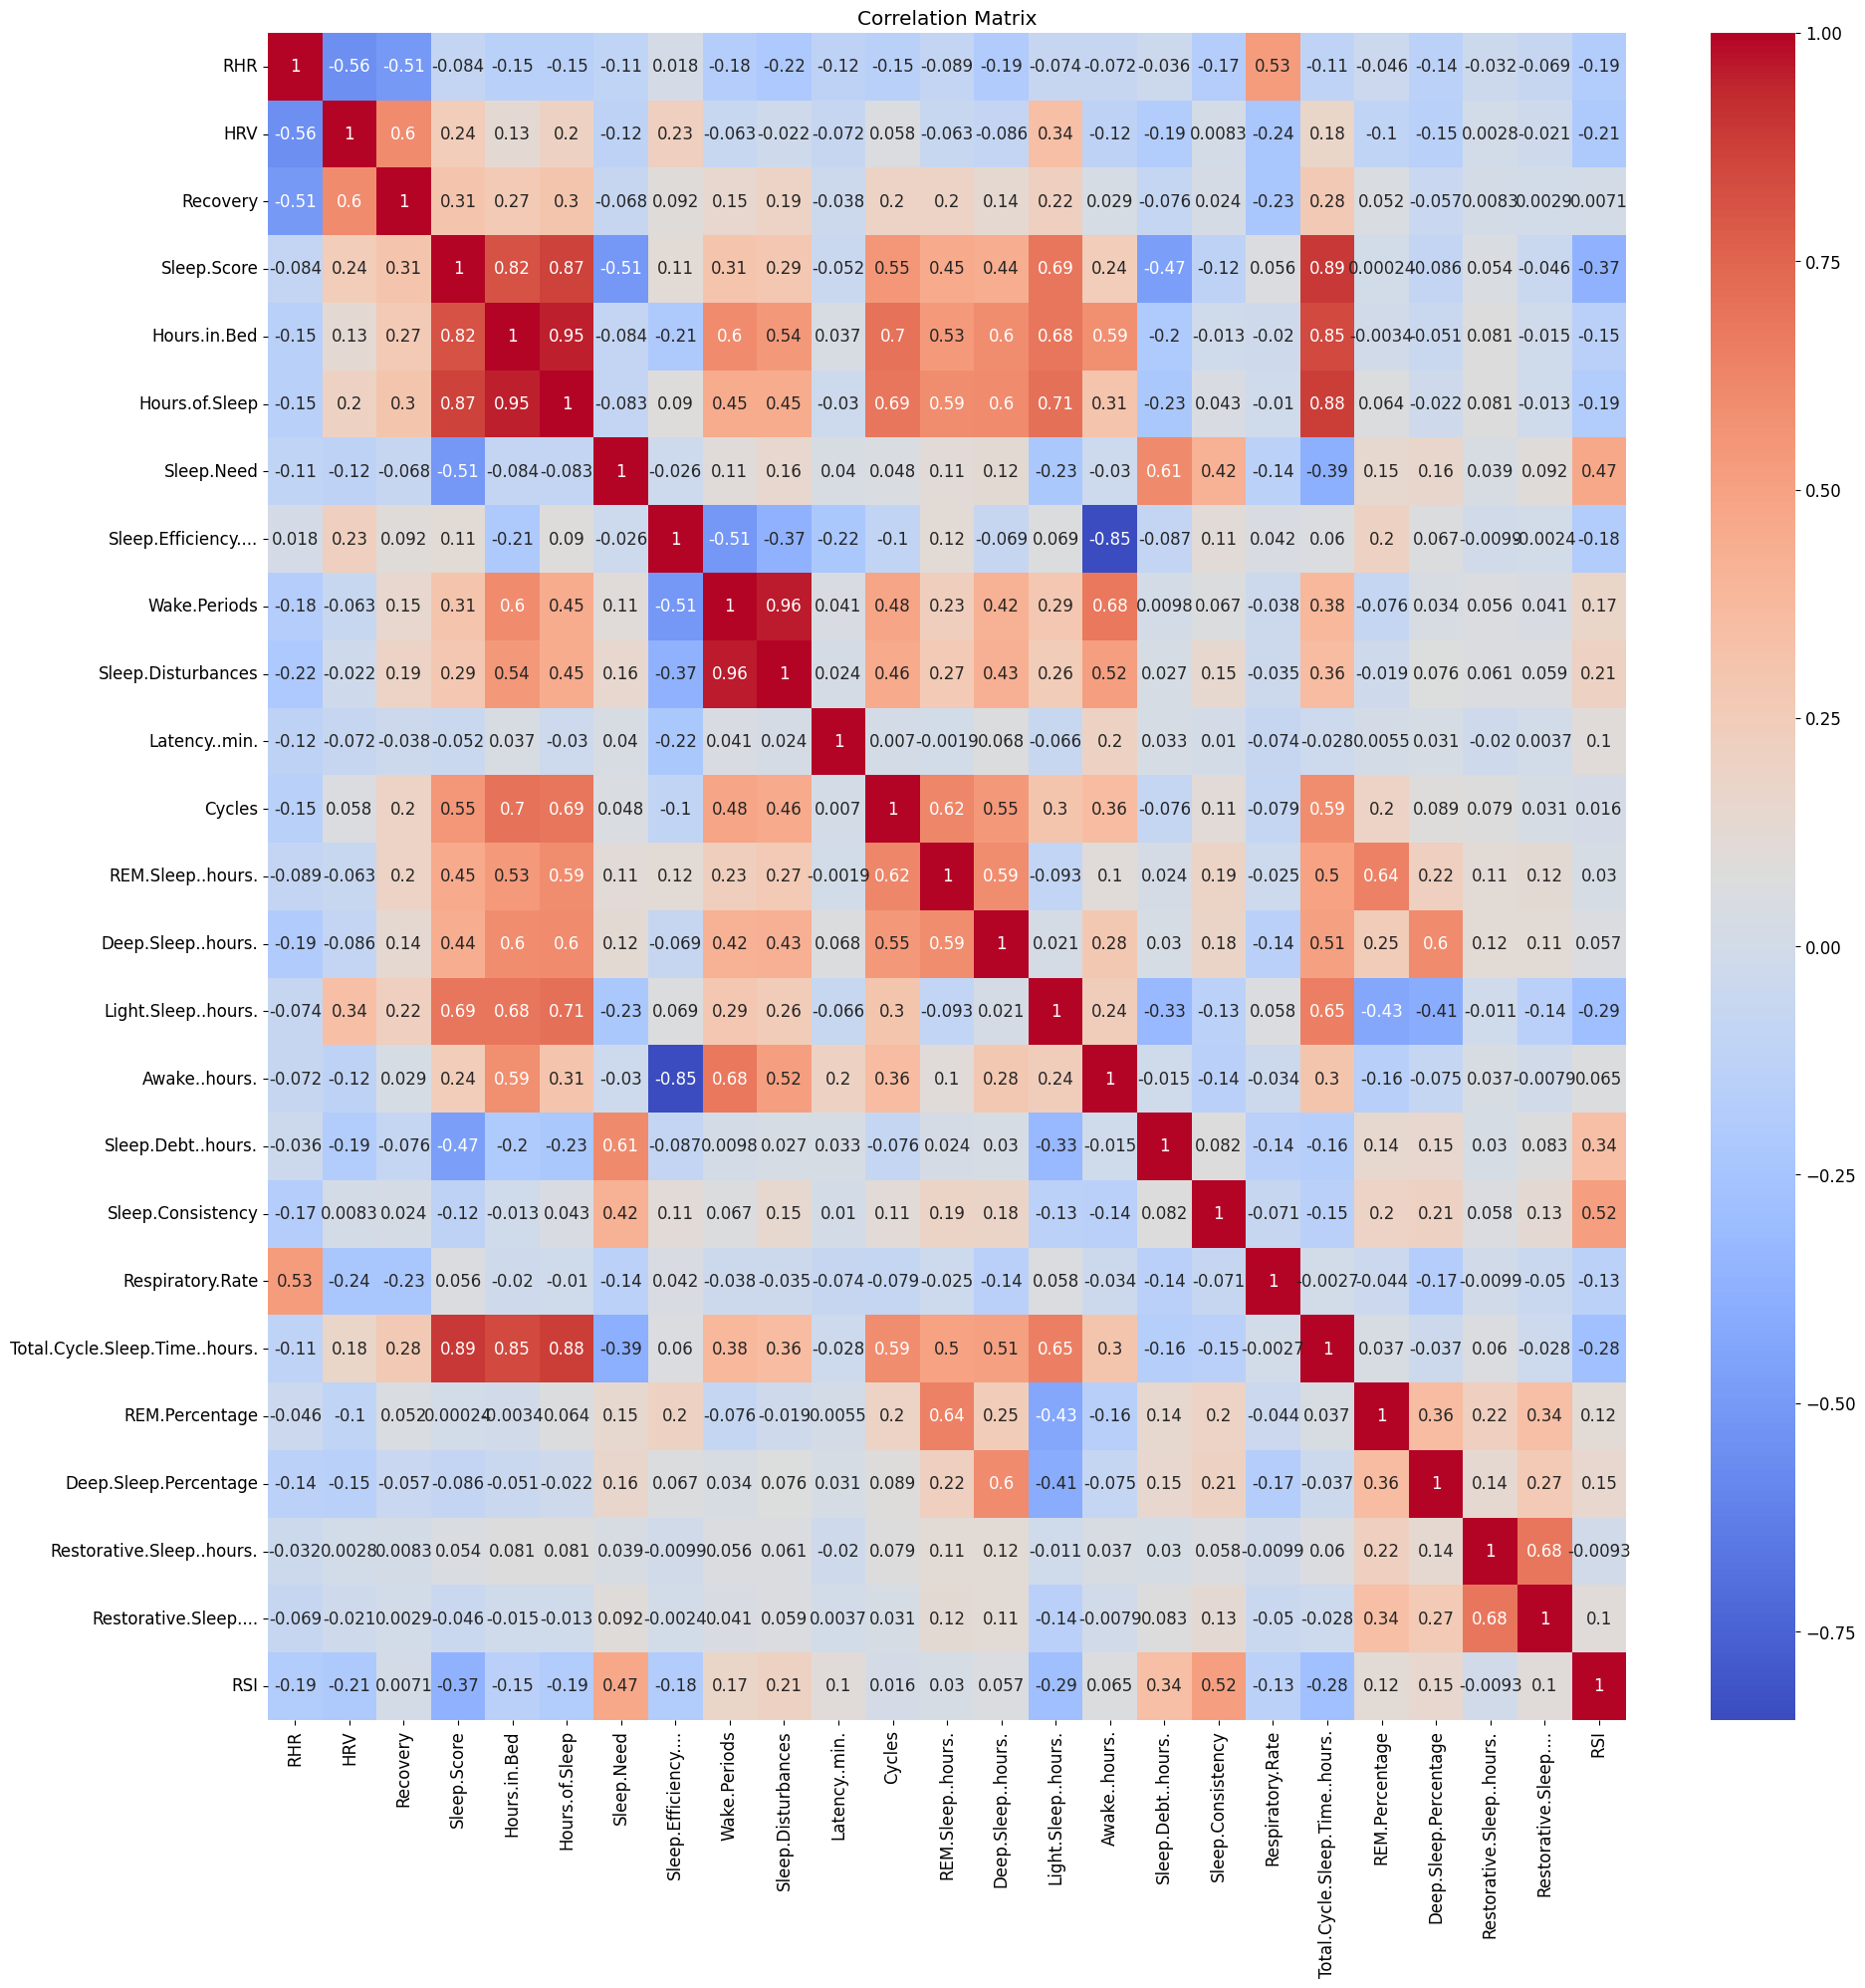

In [98]:
import seaborn as sns

fig = plt.figure(figsize=(22,22))
corr_matrix = df_imputed.corr()
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

print(df_scaled.shape)

print(df_scaled.head())

df_scaled.to_csv('Athelete_scaled.csv', index=False)


(3111, 25)
        RHR       HRV  Recovery  Sleep.Score  Hours.in.Bed  Hours.of.Sleep  \
0 -0.490795 -0.104581  0.199422    -0.229568      0.102299        0.063791   
1 -1.245194  1.294258 -0.203947    -1.566104     -0.980069       -0.999566   
2 -0.490795 -0.104581  0.199422    -0.229568      0.102299        0.063791   
3 -0.490795 -0.104581  0.199422    -0.229568      0.102299        0.063791   
4 -0.596467  1.328817 -0.040353    -1.299767     -1.051395       -1.045024   

   Sleep.Need  Sleep.Efficiency....  Wake.Periods  Sleep.Disturbances  ...  \
0    0.606221             -0.217486      0.508841            0.608955  ...   
1    1.777125             -0.046308     -1.569126           -1.460935  ...   
2    0.606221             -0.217486      0.508841            0.608955  ...   
3    0.606221             -0.217486      0.508841            0.608955  ...   
4    0.905603              0.150068     -1.389688           -1.261845  ...   

   Awake..hours.  Sleep.Debt..hours.  Sleep.Consist

In [100]:
# threshold = 0.1
# correlation_with_target = corr_matrix['RSI'].sort_values(ascending=False)
# selected_features = correlation_with_target[abs(correlation_with_target)>=threshold].index
# df_reduced = df_scaled[selected_features]
# print(df_reduced.shape)
# print(df_reduced.head())

from sklearn.feature_selection import RFE

# Define independent variables (X) and target variable (y)
X = df_scaled.drop(columns=['RSI'])  # Features (all columns except RSI)
y = df_scaled['RSI']  # Target variable

# Initialize model (RandomForestRegressor for regression)
model = xgb.XGBRegressor(n_estimators=200,learning_rate = 0.05,random_state=42)

# Set the number of features to keep
n_features_to_select = 18  # Adjust as needed

# Apply RFE
selector = RFE(model, n_features_to_select=n_features_to_select)
X_reduced = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.support_]

# Convert back to DataFrame
df_reduced = pd.DataFrame(X_reduced, columns=selected_features)
df_reduced['RSI'] = y.values

print(df_reduced.shape)
print(df_reduced.head())


(3111, 19)
        RHR       HRV  Recovery  Sleep.Score  Hours.of.Sleep  \
0 -0.490795 -0.104581  0.199422    -0.229568        0.063791   
1 -1.245194  1.294258 -0.203947    -1.566104       -0.999566   
2 -0.490795 -0.104581  0.199422    -0.229568        0.063791   
3 -0.490795 -0.104581  0.199422    -0.229568        0.063791   
4 -0.596467  1.328817 -0.040353    -1.299767       -1.045024   

   Sleep.Efficiency....  Wake.Periods  Sleep.Disturbances  REM.Sleep..hours.  \
0             -0.217486      0.508841            0.608955           0.320150   
1             -0.046308     -1.569126           -1.460935          -0.759727   
2             -0.217486      0.508841            0.608955           0.320150   
3             -0.217486      0.508841            0.608955           0.320150   
4              0.150068     -1.389688           -1.261845          -0.914376   

   Deep.Sleep..hours.  Light.Sleep..hours.  Awake..hours.  Sleep.Debt..hours.  \
0            0.459975            -0.297179

In [101]:
df_reduced.to_csv('Athelete_reduced.csv',index=False)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_reduced.drop(columns=["RSI"])
y = df_reduced["RSI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.48
Mean Squared Error: 0.46
R2 Score: 0.54


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_reduced.drop(columns=["RSI"])
y = df_reduced["RSI"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=200,random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Absolute Error: 0.19
Mean Squared Error: 0.12
R2 Score: 0.88


In [104]:
import xgboost as xgb

model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"XGBoost R2 Score: {r2:.2f}")

Mean Absolute Error: 0.16
Mean Squared Error: 0.09
XGBoost R2 Score: 0.91


 98%|===================| 3064/3111 [00:33<00:00]        /var/folders/3m/kwsp35zd7ln8cgd3tkjsk64h0000gn/T/ipykernel_31440/4173432057.py:8: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X)


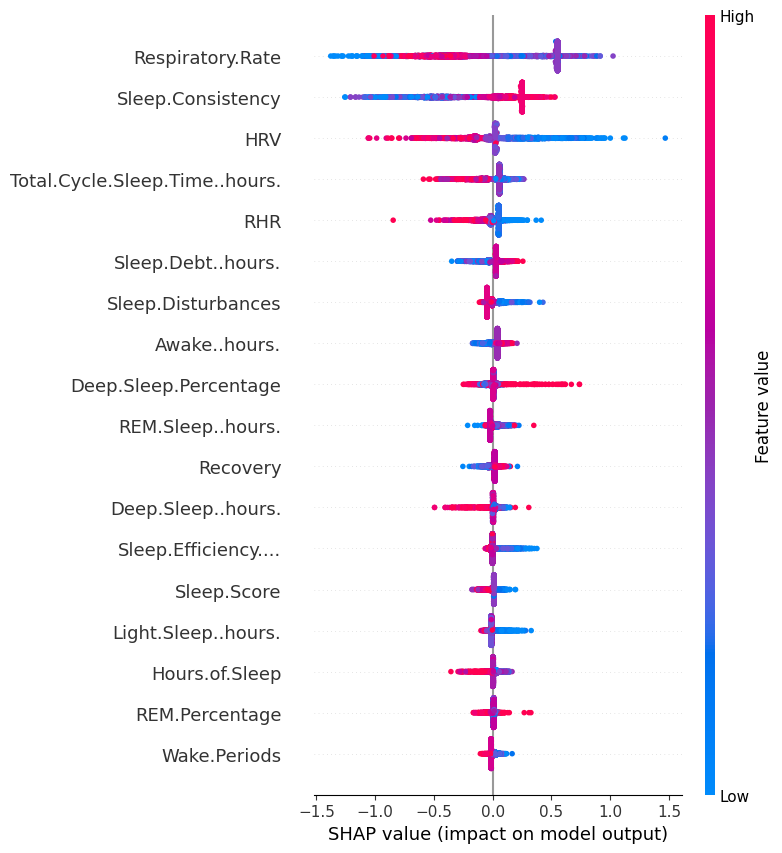

                           Feature  Importance
14                Respiratory.Rate    0.480434
13               Sleep.Consistency    0.293562
1                              HRV    0.178610
15  Total.Cycle.Sleep.Time..hours.    0.096652
0                              RHR    0.059742
12              Sleep.Debt..hours.    0.057385
7               Sleep.Disturbances    0.049276
11                   Awake..hours.    0.044617
17           Deep.Sleep.Percentage    0.033366
8                REM.Sleep..hours.    0.030786
2                         Recovery    0.027786
9               Deep.Sleep..hours.    0.026709
5             Sleep.Efficiency....    0.025458
3                      Sleep.Score    0.025340
10             Light.Sleep..hours.    0.024129
4                   Hours.of.Sleep    0.023740
16                  REM.Percentage    0.016565
6                     Wake.Periods    0.016529


In [105]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Summary plot (Feature importance visualization)
shap.summary_plot(shap_values, X)

# Get mean absolute SHAP values for each feature
shap_importance = np.abs(shap_values.values).mean(axis=0)

# Store as an array of (feature, importance) pairs
feature_importance_array = np.array(list(zip(X.columns, shap_importance)))

# Convert to DataFrame for better readability
shap_importance_df = pd.DataFrame(feature_importance_array, columns=["Feature", "Importance"])

# Sort by importance (descending)
shap_importance_df["Importance"] = shap_importance_df["Importance"].astype(float)
shap_importance_df = shap_importance_df.sort_values(by="Importance", ascending=False)

# Display the top features
print(shap_importance_df)

In [111]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the top 11 features
top_12_features = shap_importance_df["Feature"].head(12).values

# Update X to include only the selected features
X_selected = X[top_12_features]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a new XGBoost Regressor
model_xgb = xgb.XGBRegressor(n_estimators=200, learning_rate = 0.05, random_state=42)
model_xgb.fit(X_train, y_train)

# Predict on test set
y_pred = model_xgb.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

print(top_12_features)


Mean Absolute Error: 0.17
Mean Squared Error (MSE): 0.09
R-squared (R²): 0.91
['Respiratory.Rate' 'Sleep.Consistency' 'HRV'
 'Total.Cycle.Sleep.Time..hours.' 'RHR' 'Sleep.Debt..hours.'
 'Sleep.Disturbances' 'Awake..hours.' 'Deep.Sleep.Percentage'
 'REM.Sleep..hours.' 'Recovery' 'Deep.Sleep..hours.']


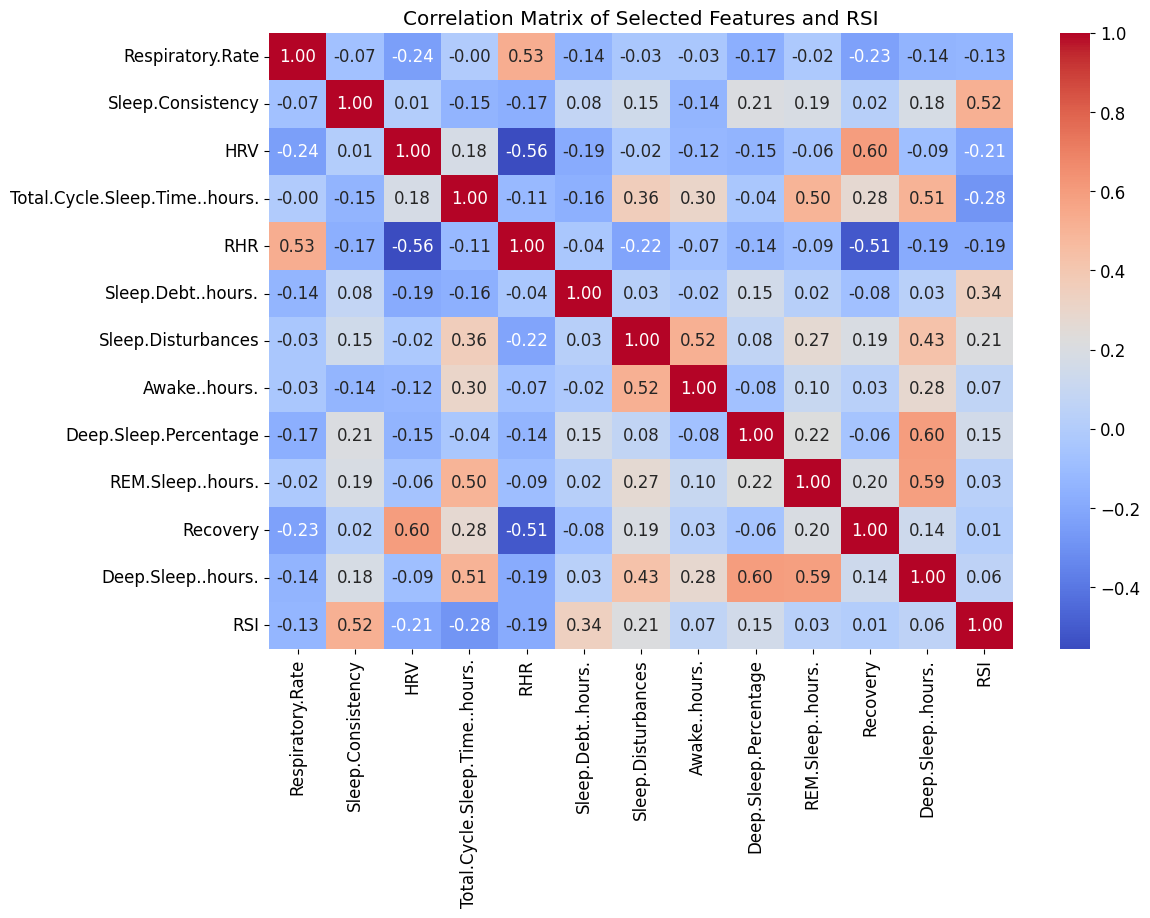

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the important features + target
selected_features = ['Respiratory.Rate', 'Sleep.Consistency', 'HRV',
                     'Total.Cycle.Sleep.Time..hours.', 'RHR', 'Sleep.Debt..hours.',
                     'Sleep.Disturbances', 'Awake..hours.', 'Deep.Sleep.Percentage',
                     'REM.Sleep..hours.', 'Recovery', 'Deep.Sleep..hours.', 'RSI']

# Compute correlation
corr_matrix = df_reduced[selected_features].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Selected Features and RSI")
plt.show()


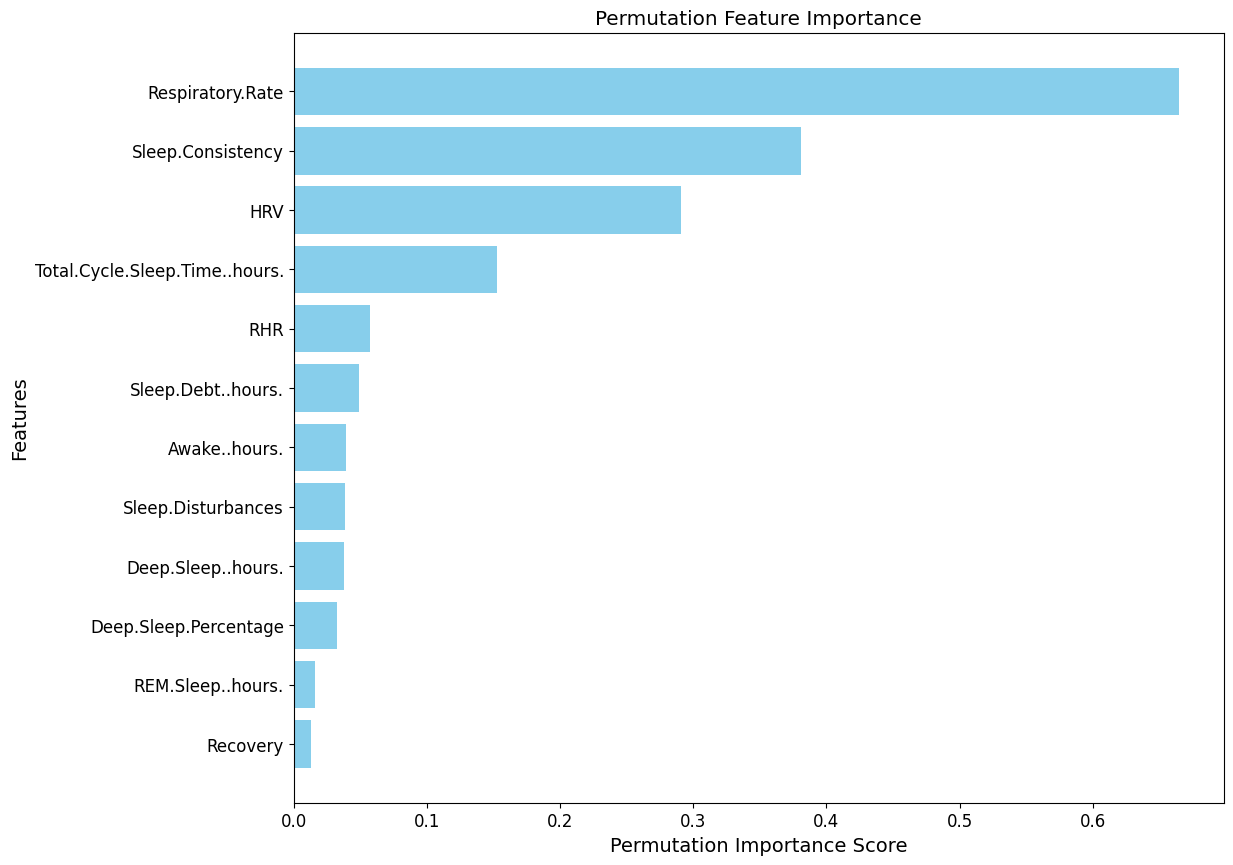

In [108]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt

# Compute permutation importance
perm_importance = permutation_importance(model_xgb, df_reduced[selected_features[:-1]], df_reduced['RSI'], scoring="r2")

# Sort features by importance
sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]
features_sorted = [selected_features[:-1][i] for i in sorted_idx]

# Plot
plt.figure(figsize=(12, 10))
plt.barh(features_sorted, perm_importance.importances_mean[sorted_idx], color="skyblue")
plt.xlabel("Permutation Importance Score")
plt.ylabel("Features")
plt.title("Permutation Feature Importance")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()


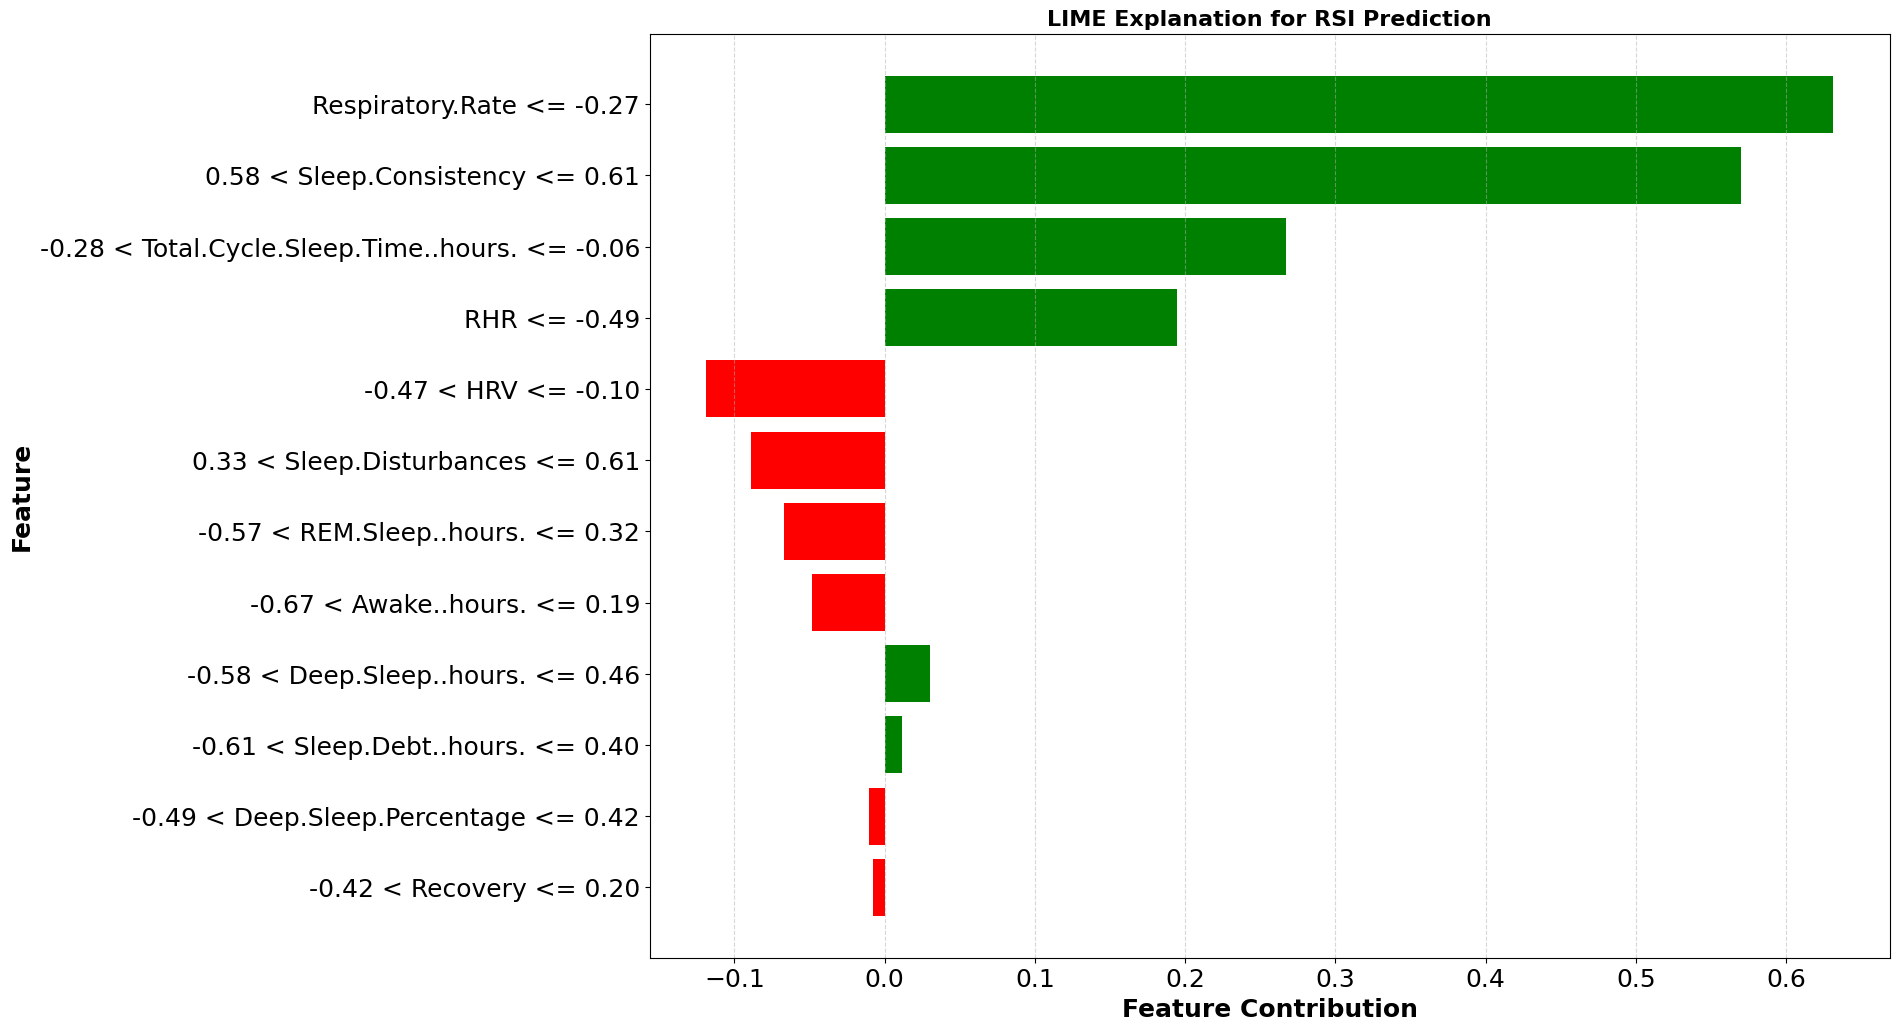

In [119]:
import numpy as np
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Create LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=df_reduced[selected_features[:-1]].values,
    feature_names=selected_features[:-1],
    class_names=["RSI"],  # Add class name for clarity
    mode="regression"
)

# Explain a single prediction (e.g., first row)
exp = explainer.explain_instance(
    df_reduced[selected_features[:-1]].iloc[0].values,
    model_xgb.predict,
    num_samples=3111 , # A balanced sample size for stability
    num_features=12
)

# Generate the explanation plot
fig = exp.as_pyplot_figure()

# Improve visualization aesthetics
plt.gcf().set_facecolor("white")  # White background
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Feature Contribution", fontsize=18, fontweight="bold")
plt.ylabel("Feature", fontsize=18, fontweight="bold")
plt.title("LIME Explanation for RSI Prediction", fontsize=16, fontweight="bold")
plt.grid(axis="x", linestyle="--", alpha=0.5)  # Add light grid lines
plt.show()
